In [92]:
!pip install squarify

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

In [2]:
df = pd.read_csv('UK_Traffic_Accidents_2015.csv')
df.shape

C:\Users\osazu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(140056, 32)

In [3]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               140056 non-null  object 
 1   Location_Easting_OSGR                        140029 non-null  float64
 2   Location_Northing_OSGR                       140029 non-null  float64
 3   Longitude                                    140029 non-null  float64
 4   Latitude                                     140029 non-null  float64
 5   Police_Force                                 140056 non-null  int64  
 6   Accident_Severity                            140056 non-null  int64  
 7   Number_of_Vehicles                           140056 non-null  int64  
 8   Number_of_Casualties                         140056 non-null  int64  
 9   Date                                         140056 non-nul

In [5]:
df.duplicated().sum()

0

In [8]:
# Drop rows with missing values
df = df[df.LSOA_of_Accident_Location.notnull()]

In [10]:
# Rename columns properly
df.columns = [labels.lower() for labels in df.columns]
df.columns = [labels.replace('-', '_') for labels in df.columns]
# test
df.columns

Index(['accident_index', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_(district)', 'local_authority_(highway)',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location'],
      dtype='object')

In [11]:
df.pedestrian_crossing_human_control.unique()

array([ 0,  1,  2, -1], dtype=int64)

In [12]:
df.pedestrian_crossing_physical_facilities.unique()

array([ 0,  1,  5,  4,  8,  7, -1], dtype=int64)

In [13]:
df.light_conditions.unique()

array([4, 1, 6, 7, 5], dtype=int64)

### What lighting conditions results in the least and highest  number of accidents?

In [57]:
df_light = df.groupby(['light_conditions'])['accident_index'].count().sort_values(ascending=False)
df_light = df_light.reset_index()

In [58]:
df_light.rename({'accident_index':'accident_count', 'light_conditions':'light_conditions_code'}, axis= 1, inplace= True)
df_light

,light_conditions_code,accident_count
0,1,96081
1,4,25995
2,6,6567
3,7,1858
4,5,658


In [59]:
light_map = {'light_conditions_code':[1,4,5,6,7],
             'light_condition':['Daylight' ,'Darkness: streetlight present & lit', 'Darkness: streetlight present but not lit','Darkness: No streetlight', 'Darkness: streetlighting unknow']}
light = pd.DataFrame(light_map)
light

,light_conditions_code,light_condition
0,1,Daylight
1,4,Darkness: streetlight present & lit
2,5,Darkness: streetlight present but not lit
3,6,Darkness: No streetlight
4,7,Darkness: streetlighting unknow


In [60]:
df_light = pd.merge(df_light, light, on= 'light_conditions_code', how = 'outer')
df_light

,light_conditions_code,accident_count,light_condition
0,1,96081,Daylight
1,4,25995,Darkness: streetlight present & lit
2,6,6567,Darkness: No streetlight
3,7,1858,Darkness: streetlighting unknow
4,5,658,Darkness: streetlight present but not lit


[Text(0.5, 1.0, 'Accident Count at various Lighting Conditions')]

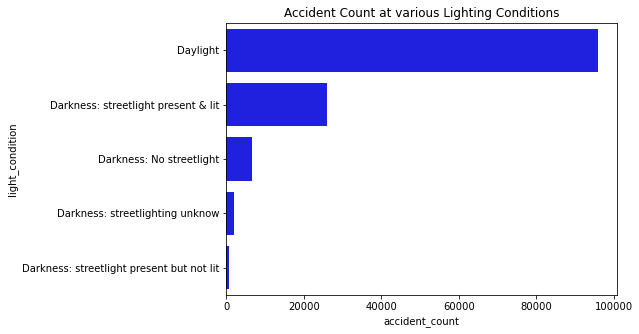

In [62]:
plt.figure(figsize=(7,5))
sns.barplot(data = df_light, y = 'light_condition', x = 'accident_count', color= 'b').set(title = 'Accident Count at various Lighting Conditions')

The chart show that most accident occurs during the daylight which is the best lighting condition. This maybe due to the fact that most driving activities are within the daytime. Furthermore, lighting condition seems to give very little or explanation as to the cause for accident as more of the accidents occured during the best light conditions and fewer accidents during the worst lighting conditions.

### Does lighting condition affects accident severity?

In [78]:
li_sev_df = df.groupby(['light_conditions', 'accident_severity'])['accident_index'].count()
li_sev_df = li_sev_df.reset_index()
li_sev_df

,light_conditions,accident_severity,accident_index
0,1,1,872
1,1,2,12987
2,1,3,82222
3,4,1,271
4,4,2,3817
5,4,3,21907
6,5,1,14
7,5,2,128
8,5,3,516
9,6,1,271


In [79]:
li_sev_df.rename({'accident_index':'accident_count', 'light_conditions':'light_conditions_code', 'accident_severity':'severity_code'}, axis= 1, inplace= True)
li_sev_df

,light_conditions_code,severity_code,accident_count
0,1,1,872
1,1,2,12987
2,1,3,82222
3,4,1,271
4,4,2,3817
5,4,3,21907
6,5,1,14
7,5,2,128
8,5,3,516
9,6,1,271


In [80]:
severity_map = {'severity_code':[1,2,3],
             'accident_severity':['fatal' ,'serious', 'slight']}
severity = pd.DataFrame(severity_map)
severity

,severity_code,accident_severity
0,1,fatal
1,2,serious
2,3,slight


In [81]:
li_sev_df = pd.merge(li_sev_df, severity, on= 'severity_code', how = 'outer')
li_sev_df = pd.merge(li_sev_df, light, on= 'light_conditions_code', how = 'outer')
li_sev_df

,light_conditions_code,severity_code,accident_count,accident_severity,light_condition
0,1,1,872,fatal,Daylight
1,1,2,12987,serious,Daylight
2,1,3,82222,slight,Daylight
3,4,1,271,fatal,Darkness: streetlight present & lit
4,4,2,3817,serious,Darkness: streetlight present & lit
5,4,3,21907,slight,Darkness: streetlight present & lit
6,5,1,14,fatal,Darkness: streetlight present but not lit
7,5,2,128,serious,Darkness: streetlight present but not lit
8,5,3,516,slight,Darkness: streetlight present but not lit
9,6,1,271,fatal,Darkness: No streetlight


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Daylight'),
  Text(1, 0, 'Darkness: streetlight present & lit'),
  Text(2, 0, 'Darkness: streetlight present but not lit'),
  Text(3, 0, 'Darkness: No streetlight'),
  Text(4, 0, 'Darkness: streetlighting unknow')])

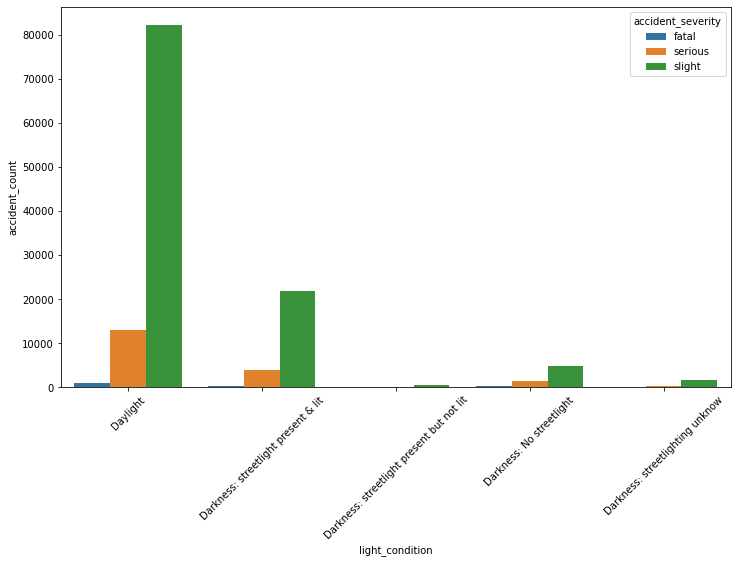

In [112]:
plt.figure(figsize=(12, 7))
sns.barplot(data = li_sev_df, x= 'light_condition', y = 'accident_count', hue = 'accident_severity')
plt.xticks(rotation=45)

Accident severity have similar distribution accross the different lighting conditions. Most accidents are slight while fatal accidents have the lowest recorded number irrespective of the lighting condition.

### Does the presence of a pedestrial crossing-human control reduce accident occurence?

In [100]:
ped_hc_df = df.groupby('pedestrian_crossing_human_control')['accident_index'].count().sort_values(ascending = False)
ped_hc_df = ped_hc_df.reset_index()
ped_hc_df.rename({'accident_index':'accident_count', 'pedestrian_crossing_human_control':'hc_code'}, axis= 1, inplace= True)
ped_hc_df

,hc_code,accident_count
0,0,130422
1,2,357
2,1,244
3,-1,136


In [101]:
hc_map = {'hc_code':[0,1,2,-1],
             'pedestrian_crossing_human_control':['None within 50metres' ,'Control by schoool patrol', 'Control other authorised person', 'Data missing or out of range']}
hc = pd.DataFrame(hc_map)
hc

,hc_code,pedestrian_crossing_human_control
0,0,None within 50metres
1,1,Control by schoool patrol
2,2,Control other authorised person
3,-1,Data missing or out of range


### Does the presence of a pedestrial crossing-physical facilities reduce accident occurence?

In [102]:
ped_hc_df = pd.merge(ped_hc_df, hc, on = 'hc_code', how = 'outer')
ped_hc_df

,hc_code,accident_count,pedestrian_crossing_human_control
0,0,130422,None within 50metres
1,2,357,Control other authorised person
2,1,244,Control by schoool patrol
3,-1,136,Data missing or out of range


[Text(0.5, 1.0, 'Accident Count for Various Pedestrian Crossing human control Situation')]

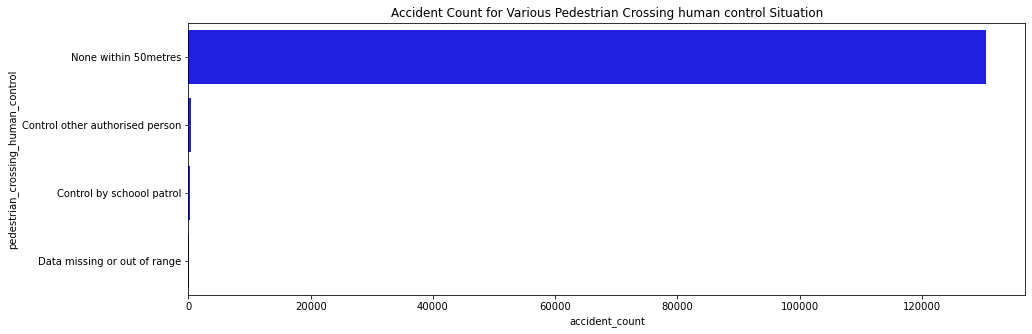

In [114]:
plt.figure(figsize=(15,5))
sns.barplot(data = ped_hc_df, y = 'pedestrian_crossing_human_control', x = 'accident_count', color= 'b').set(title = 'Accident Count for Various Pedestrian Crossing human control Situation')

Majority of recorded accidents occurred with no pedestrian crossing human control within 50 metres. Accidents that occurred for other conditions are minimal.

In [119]:
ped_pf_df = df.groupby('pedestrian_crossing_physical_facilities')['accident_index'].count().sort_values(ascending = False)
ped_pf_df = ped_pf_df.reset_index()
ped_pf_df.rename({'accident_index':'accident_count', 'pedestrian_crossing_physical_facilities':'pf_code'}, axis= 1, inplace= True)
ped_pf_df

,pf_code,accident_count
0,0,106184
1,5,10149
2,4,7172
3,1,4158
4,8,2995
5,7,377
6,-1,124


In [120]:
pf_map = {'pf_code':[0,1,4,5,7,8,-1],
             'pedestrian_crossing_physical_facility':['None within 50metres' ,'Zebra', 'Pelican, puffin, etc', 'Pedestrian phase at signal junction','Footbridge or Subway','Central refuge', 'Missing or out of range']}
pf = pd.DataFrame(pf_map)
pf

,pf_code,pedestrian_crossing_physical_facility
0,0,None within 50metres
1,1,Zebra
2,4,"Pelican, puffin, etc"
3,5,Pedestrian phase at signal junction
4,7,Footbridge or Subway
5,8,Central refuge
6,-1,Missing or out of range


In [121]:
ped_pf_df = pd.merge(ped_pf_df, pf, on = 'pf_code', how = 'outer')
ped_pf_df

,pf_code,accident_count,pedestrian_crossing_physical_facility
0,0,106184,None within 50metres
1,5,10149,Pedestrian phase at signal junction
2,4,7172,"Pelican, puffin, etc"
3,1,4158,Zebra
4,8,2995,Central refuge
5,7,377,Footbridge or Subway
6,-1,124,Missing or out of range


In [128]:
si = ped_pf_df.accident_count.to_list()
label = ped_pf_df.pf_code.to_list()

(0.0, 100.0, 0.0, 100.0)

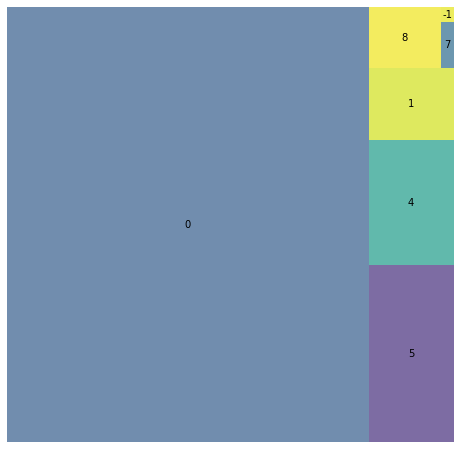

In [133]:
plt.figure(figsize=(8,8))
sq.plot(sizes= si, label= label, alpha=0.7)
plt.axis('off')


[Text(0.5, 1.0, 'Accident Count for Various Pedestrian Crossing Physical Facility Situation')]

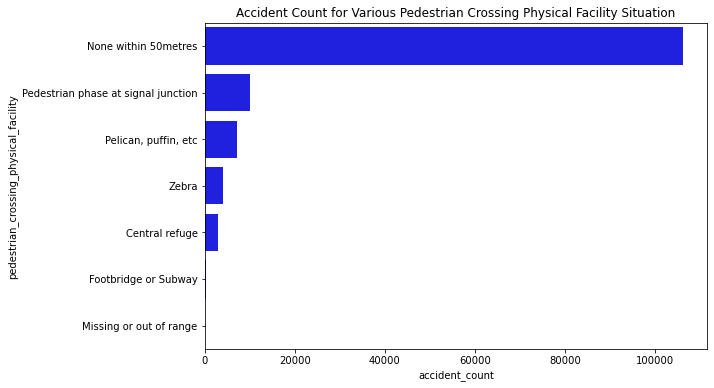

In [134]:
plt.figure(figsize=(9,6))
sns.barplot(data = ped_pf_df, y = 'pedestrian_crossing_physical_facility', x = 'accident_count', color= 'b').set(title = 'Accident Count for Various Pedestrian Crossing Physical Facility Situation')

Most accidents occured in areas with no pedestrian cross- phsical facility.